# Forward Substitution
Consider the following 2-by-2 lower triangular system:
$$\left.\left[\begin{array}{cc}\ell_{11}&0\\\ell_{21}&\ell_{22}\end{array}\right.\right]\left[\begin{array}{c}x_1\\x_2\end{array}\right] = \left[\begin{array}{c}b_1\\b_2\end{array}\right].$$

If l11l22 ≠0, then the unknowns can be determined sequentially:
$$\begin{aligned}&x_{1}=b_1/\ell_{11},\\&x_{2}=(b_2-\ell_{21}x_1)/\ell_{22}.\end{aligned}$$

乘除次数：
加减次数

#上三角矩阵

In [25]:
using Pkg
Pkg.add("PyPlot")

    Updating registry at `C:\Users\HP\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\HP\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\HP\.julia\environments\v1.10\Manifest.toml`


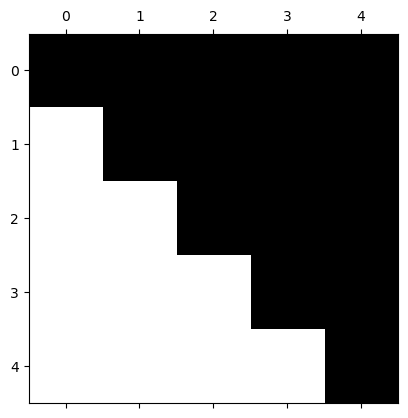

[-0.6851430528648663 -2.7440225997113172 2.005603326686823 -0.34977500554144303 -0.23552727391709932; 0.0 0.5247768458471468 1.0237487912628949 0.010963296211168714 0.21702226776794742; 0.0 0.0 -0.8627865472827599 0.18257527050134403 -0.10772313537401763; 0.0 0.0 0.0 -0.17532124958962364 -1.3932606233072768; 0.0 0.0 0.0 0.0 -0.7694153549341771]


In [35]:
using PyPlot
using LinearAlgebra
using BenchmarkTools

#上三角随机生成
n = 5
A = zeros(n,n)

for i in 1:n
    for j = i:n
        A[i,j] = randn(1)[1]
    end
end
b = randn(n)

figure()
spy(A)
display(gcf())

In [39]:
x = zeros(n)
for i in n:-1:1 
    # x[i] = b[i]
    # println(i)
    for j in i+1 : n
        println(j)
        x[i] -= A[i,j] *x[j]
    end
    # x[i] = x[i] / A[i,i]
end



5
4
5
3
4
5
2
3
4
5


两重循环一般都是O($n^{2}$)

  2.411 μs (92 allocations: 1.84 KiB)


5-element Vector{Float64}:
   8.866981424267099
 -10.904667736442766
   7.682159579925441
  13.94053294737298
   7.4582860118711665

# 解线性方程组——高斯消元法

线性方程组可以用它的增广矩阵来描述，与它的增广矩阵是一一对应的
例如，线性方程组
$$\begin{cases}2x_{1}+3x_{3}=1,\\x_{1}-x_{2}+2x_{3}=1,\\x_{1}-3x_{2}+4x_{3}=2,\end{cases}$$
对应的增广矩阵是
$$\begin{pmatrix}2&0&3&1\\1&-1&2&1\\1&-3&4&2\end{pmatrix}$$

In [ ]:
function back_sub(A,b)
    x = zeros(n)
    for i in n:-1:1 
        x[i] = b[i]
        for j in i+1 :n
            x[i] -= A[i,j] *x[j]
        end
        x[i] = x[i] / A[i,i]
    end
    return x
end
@btime back_sub(A,b)

In [111]:
#步骤：给一个初始矩阵，写出增广矩阵，然后化成上三角矩阵，调用已编写的function back_sub(A,b)求解
function gauss_elimination(A,b)
    C =hcat(A,b)
    for i in 1:n
        pivot =A[i,i]
        for j in i+1:n
            basemanet = C[j,i]/pivot
            C[j,:] = C[j,:] -(basemanet .* C[i,:]) 
        end
    end
    println(C)
    D = C[:,1:n]
    e = C[:,4]
    return D,e
end

gauss_elimination (generic function with 1 method)

In [159]:
# n = 3
# #随机生成矩阵
# A = zeros(n,n)
# for i in 1:n
#     for j = 1:n
#         A[i,j] = rand(1)[1]
#     end
# end
# b = rand(n);
D,e = gauss_elimination(A,b);
x = back_sub(D,e)

[1.0 2.0 -1.0 8.0; 0.0 -7.0 5.0 -35.0; 0.0 18.0 -15.0 86.0]


3-element Vector{Float64}:
  0.4571428571428573
  0.9047619047619045
 -5.733333333333333

In [150]:
x = A \ b

3-element Vector{Float64}:
 -2.7999999999999994
  6.333333333333332
  1.8666666666666658

In [156]:
n = 3;
A = [2.0 0 3.0;1.0 -1.0 2.0;1.0 -3.0 4.0];
b = [1.0; 1.0; 2.0];

In [158]:
n=3
A = [1.0 2.0 -1.0; 3.0 -1.0 2.0; 2.0 1.0 -2.0]
b = [8.0; -11.0; -3]
A

3×3 Matrix{Float64}:
 1.0   2.0  -1.0
 3.0  -1.0   2.0
 2.0   1.0  -2.0

第7周矩阵计算作业
- 推导矩阵逆的复杂度
- 写一个带排序的高斯消元法